![logo](https://github.com/heberrossi/Curso_CientistaDeDados_EBAC_Exercicios/blob/main/logo/ebac_logo-data_science.png?raw=true)


# Tarefa

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats       as stats

from statsmodels.stats.weightstats import ttest_ind

In [2]:
# carregar os dados

pg = sns.load_dataset('penguins')
pg

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
# descrição estatística completa do peso corporal (em gramas) dos pinguins
# agrupados por sexo usando o método groupby

pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

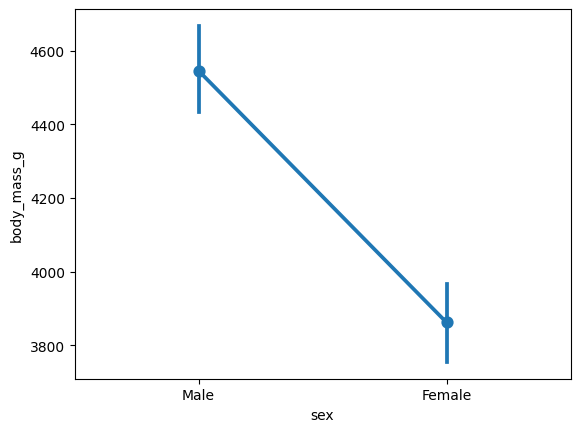

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [5]:
# contagem do número total de pinguins
n_len = len(pg)

# contagem do número de pinguins por sexo
n_machos = len(pg[pg['sex'] == 'Male'])
n_fêmeas = len(pg[pg['sex'] == 'Female'])

# criando uma variável com grau de liberdade
gl = n_machos + n_fêmeas - 2 # grau de liberdade

# mostrando resultadoss
print(f'n_len: {n_len}')
print(f'n_machos: {n_machos}')
print(f'n_fêmeas: {n_fêmeas}')
print(f'gl: {gl}')


n_len: 344
n_machos: 168
n_fêmeas: 165
gl: 331


In [6]:
# criando objeto com desvio padrão agrupando sexo e peso dos pinguins
desvpad = pg.groupby('sex')['body_mass_g'].var().mean()**.5

# média de peso dos pinguins por sexo
media_machos = pg.groupby('sex')['body_mass_g'].mean()['Male']
media_femeas = pg.groupby('sex')['body_mass_g'].mean()['Female']


diferença = media_machos - media_femeas # Numerador da fórmula
erro_padrao = desvpad*((2/166.5)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao     # Estatística do teste
RC = stats.t.ppf(.95, gl)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-stats.t.cdf(t, gl)     # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

if p_value < 0.05:
    print("P-value < 5% \n\n Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.")
else:
    print("P-value > 5% \n\n Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")

diferença: 683.41
desvio padrão: 729.43
erro padrão: 79.95
estatística do teste: 8.55
região crítica: 1.65 ou mais
p-value: 0.00000 ou mais
P-value < 5% 

 Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.


In [7]:
# PELO STATSMODELS

# Salvando em objeto os pinguins por sexo e captando seus pesos
x1 = pg.loc[pg['sex'] == 'Male', 'body_mass_g']
x2 = pg.loc[pg['sex'] == 'Female', 'body_mass_g']

# executando teste T e salvando em um objeto
teste_t = ttest_ind(x1, x2, alternative='larger', usevar='pooled', value=0)

print(f'Machos: {x1.shape[0]}')
print(f'Fêmeas: {x2.shape[0]}')
print(f'Variância machos: {x1.var():.2f}')
print(f'Variância fêmeas: {x2.var():.2f}')
print(f'Desvio padrão machos: {x1.std():.2f}')
print(f'Desvio padrão fêmeas: {x2.std():.2f}')
print(f'Média machos: {x1.mean():.2f}')
print(f'Média fêmeas: {x2.mean():.2f}')
print(f'Estatística do teste: {teste_t[0]:.2f}')
print(f'             P-value: {teste_t[1]:.4f}')
print(f'  Graus de liberdade: {teste_t[2]:.2f}')

P_value = teste_t[1]

if P_value < 0.05:
    print("P-value < 5% \n\n Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.")
else:
    print("P-value > 5% \n\n Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")

Machos: 168
Fêmeas: 165
Variância machos: 620359.26
Variância fêmeas: 443785.20
Desvio padrão machos: 787.63
Desvio padrão fêmeas: 666.17
Média machos: 4545.68
Média fêmeas: 3862.27
Estatística do teste: 8.54
             P-value: 0.0000
  Graus de liberdade: 331.00
P-value < 5% 

 Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

A probabilidade para valores entre 1,65 e inf é de 5,00%


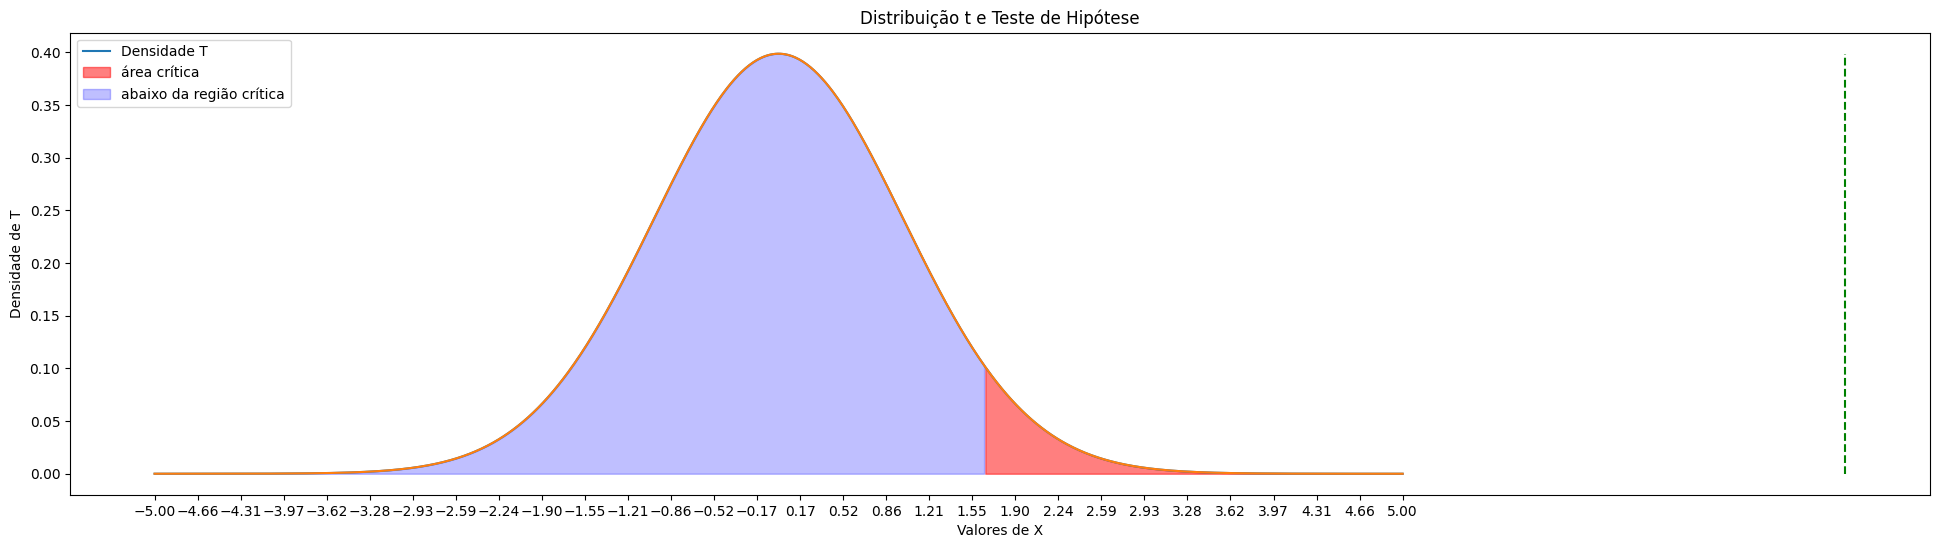

In [8]:
fig, ax = plt.subplots(figsize=(24,6))

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de X e Y para plotar a densidade
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
y = stats.t.pdf(x, gl)

# Plotar a densidade sob H0
ax.plot(x, y, label='Densidade T')

# low = início da região crítica do teste
low = stats.t.ppf(.95, gl)
# high = fim da região crítica do teste
#high = stats.t.ppf(.95, gl)
high = np.inf

# Gráfico da densidade
ax.plot(x, y)

# Esta linha de referência marca a região crítica do teste
ax.vlines(x=[t],
             ymin=y.min(), ymax=y.max(),
             colors='g', linestyles='dashed')

plt.xticks(np.linspace(-5, 5, 30))

# área crítica e área aceitável
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5, color='red', label = 'área crítica')
plt.fill_between(x, y, where=(low > x), alpha=.25, color = 'blue', label = 'abaixo da região crítica')

# Probabilidade de X pertencer à área
prob_area = stats.t.cdf(high, gl) - stats.t.cdf(low, gl)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

# Legenda e rótulos
ax.legend(loc='upper left')
ax.set_title('Distribuição t e Teste de Hipótese')
ax.set_xlabel('Valores de X')
ax.set_ylabel('Densidade de T')

plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [9]:
pg.groupby('species')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


###ADELIE

In [10]:
sp1 = pg.loc[(pg.sex == 'Male') & (pg.species == 'Adelie'), 'body_mass_g']
sp2 = pg.loc[(pg.sex == 'Female') & (pg.species == 'Adelie'), 'body_mass_g']

teste_t_ade = ttest_ind(sp1, sp2, alternative='larger', usevar='pooled', value=0)

desvpad = pg.groupby(['sex', 'species'])['body_mass_g'].var().mean()**.5

gl_ade = sp1.shape[0] + sp2.shape[0] - 2 # grau de liberdade

print(f'Machos: {sp1.shape[0]}')
print(f'Fêmeas: {sp2.shape[0]}')
print(f'Média machos: {sp1.mean():.2f}')
print(f'Média fêmeas: {sp2.mean():.2f}')
print(f'Desvio padrão machos: {sp1.std():.2f}')
print(f'Desvio padrão fêmeas: {sp2.std():.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {desvpad*((2/73)**.5):.2f}')
print(f'região crítica: {stats.t.ppf(.95, gl_ade):.2f} ou mais')
print(f'Estatística do teste: {teste_t_ade[0]:.2f}')
print(f'             P-value: {teste_t_ade[1]:.4f}')
print(f'  Graus de liberdade: {teste_t_ade[2]:.2f}')

P_value = teste_t[1]

if P_value < 0.05:
    print("P-value < 5% \n\n Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.")
else:
    print("P-value > 5% \n\n Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")

Machos: 73
Fêmeas: 73
Média machos: 4043.49
Média fêmeas: 3368.84
Desvio padrão machos: 346.81
Desvio padrão fêmeas: 269.38
desvio padrão: 311.65
erro padrão: 51.58
região crítica: 1.66 ou mais
Estatística do teste: 13.13
             P-value: 0.0000
  Graus de liberdade: 144.00
P-value < 5% 

 Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.


###CHINSTRAP

In [11]:
sp3 = pg.loc[(pg.sex == 'Male') & (pg.species == 'Chinstrap'), 'body_mass_g']
sp4 = pg.loc[(pg.sex == 'Female') & (pg.species == 'Chinstrap'), 'body_mass_g']

teste_t_chin = ttest_ind(sp3, sp4, alternative='larger', usevar='pooled', value=0)

desvpad = pg.groupby(['sex', 'species'])['body_mass_g'].var().mean()**.5

gl_chin = sp3.shape[0] + sp4.shape[0] - 2 # grau de liberdade

print(f'Machos: {sp3.shape[0]}')
print(f'Fêmeas: {sp4.shape[0]}')
print(f'Média machos: {sp3.mean():.2f}')
print(f'Média fêmeas: {sp4.mean():.2f}')
print(f'Desvio padrão machos: {sp3.std():.2f}')
print(f'Desvio padrão fêmeas: {sp4.std():.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {desvpad*((2/34)**.5):.2f}')
print(f'região crítica: {stats.t.ppf(.95, gl_chin):.2f} ou mais')
print(f'Estatística do teste: {teste_t_chin[0]:.2f}')
print(f'             P-value: {teste_t_chin[1]:.4f}')
print(f'  Graus de liberdade: {teste_t_chin[2]:.2f}')

P_value = teste_t[1]

if P_value < 0.05:
    print("P-value < 5% \n\n Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.")
else:
    print("P-value > 5% \n\n Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")

Machos: 34
Fêmeas: 34
Média machos: 3938.97
Média fêmeas: 3527.21
Desvio padrão machos: 362.14
Desvio padrão fêmeas: 285.33
desvio padrão: 311.65
erro padrão: 75.59
região crítica: 1.67 ou mais
Estatística do teste: 5.21
             P-value: 0.0000
  Graus de liberdade: 66.00
P-value < 5% 

 Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.


###GENTOO

In [12]:
sp5 = pg.loc[(pg.sex == 'Male') & (pg.species == 'Gentoo'), 'body_mass_g']
sp6 = pg.loc[(pg.sex == 'Female') & (pg.species == 'Gentoo'), 'body_mass_g']

teste_t_gen = ttest_ind(sp5, sp6, alternative='larger', usevar='pooled', value=0)

desvpad = pg.groupby(['sex', 'species'])['body_mass_g'].var().mean()**.5

gl_gen = sp5.shape[0] + sp6.shape[0] - 2 # grau de liberdade

print(f'Machos: {sp5.shape[0]}')
print(f'Fêmeas: {sp6.shape[0]}')
print(f'Média machos: {sp5.mean():.2f}')
print(f'Média fêmeas: {sp6.mean():.2f}')
print(f'Desvio padrão machos: {sp5.std():.2f}')
print(f'Desvio padrão fêmeas: {sp6.std():.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {desvpad*((2/59.5)**.5):.2f}')
print(f'região crítica: {stats.t.ppf(.95, gl_gen):.2f} ou mais')
print(f'Estatística do teste: {teste_t_gen[0]:.2f}')
print(f'             P-value: {teste_t_gen[1]:.4f}')
print(f'  Graus de liberdade: {teste_t_gen[2]:.2f}')

P_value = teste_t[1]

if P_value < 0.05:
    print("P-value < 5% \n\n Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.")
else:
    print("P-value > 5% \n\n Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")

Machos: 61
Fêmeas: 58
Média machos: 5484.84
Média fêmeas: 4679.74
Desvio padrão machos: 313.16
Desvio padrão fêmeas: 281.58
desvio padrão: 311.65
erro padrão: 57.14
região crítica: 1.66 ou mais
Estatística do teste: 14.72
             P-value: 0.0000
  Graus de liberdade: 117.00
P-value < 5% 

 Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.
